# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Nafa Khairunnisa
- Email: nkhairunn2412@gmail.com
- Id Dicoding: nafa-khairunnisa

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Libraries yang sering digunakan
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import json
import joblib

In [ ]:
# Libraries untuk data preparation
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import f_oneway

In [ ]:
# Libraries untuk modeling
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Feature Engineering Tambahan
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

### Menyiapkan data yang akan digunakan

In [3]:
# Data Loading
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df = pd.read_csv(url, sep=';')

df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Pada tahapan ini, dataset student performance dibaca dan dipahami untuk mengetahui informasi yang ada dalam dataset dan mencari hubungan antar fitur yang menyebabkan mahasiswa drop out.

In [ ]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Insights**:

- Dataset memiliki total 4424 sampel.
- Terdiri 7 fitur bertipe data float, 29 fitur bertipe data integer, dan 1 fitur bertipe data object.
- Fitur status merupakan label target klasifikasi.

In [ ]:
# Deskripsi variabel
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


**Insights**: </br>
Terdapat gap yang sangat besar pada fitur course yaitu nilai minimum 33 dan maksimum 9991.

In [ ]:
# Cek jumlah data duplikat
df_duplicated = df.duplicated().sum()
print("Jumlah data duplikat : ", df_duplicated)

# Cek missing value
df.isna().sum()

Jumlah data duplikat :  0


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


**Insights**: </br>
- Tidak ada data duplikat maupun missing value.

In [ ]:
# Cek nilai unique
df.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


In [ ]:
# Cek nilai unique

# Marital_status
print("Marital_status :", df['Marital_status'].unique())

# Application_mode
print("Application_mode :", df['Application_mode'].unique())

# Course
print("Course :", df['Course'].unique())

# Previous_qualification
print("Previous_qualification :", df['Previous_qualification'].unique())

# Nacionality
print("Nacionality :", df['Nacionality'].unique())

# Mothers_qualification
print("Mothers_qualification :", df['Mothers_qualification'].unique())

# Fathers_qualification
print("Fathers_qualification :", df['Fathers_qualification'].unique())

# Mothers_occupation
print("Mothers_occupation :", df['Mothers_occupation'].unique())

# Fathers_occupation
print("Fathers_occupation :", df['Fathers_occupation'].unique())

# Status
print("Status :", df['Status'].unique())

Marital_status : [1 2 4 3 5 6]
Application_mode : [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Course : [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Previous_qualification : [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Nacionality : [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
Mothers_qualification : [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
Fathers_qualification : [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31]
Mothers_occupation : [  5   3   9   7   4   1 125   0   6   2  90   8 141 175  99 191 151 194
 192 132 152 134  10 143 123 173 193 122 144 131 171 153]
Fathers_occupation : [  9   3   7  10   5   8   4   1   2 124   6   0  90 175 121  99 144 195
 192 161 193 151 182 132 131 194 163 135 143 171 103 172 152 183 122 102
 181 134 123 112 153 174 141 114 101 154]
Status : ['Dro

In [ ]:
# Cek nilai Course
print("Nilai terkecil:", df['Course'].min())
print("Nilai terbesar:", df['Course'].max())
print("10 nilai Course teratas:")
print(df['Course'].value_counts().head(10))

print("10 nilai Course terbawah:")
print(df['Course'].value_counts().tail(10))

Nilai terkecil: 33
Nilai terbesar: 9991
10 nilai Course teratas:
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
Name: count, dtype: int64
10 nilai Course terbawah:
Course
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64


### EDA

Exploratory Data Analysis dilakukan untuk mengeksplor data dan mencari pengetahuan dari data. Pada kasus ini, tujuannya untuk mengetahui fitur apa saja yang berpengaruh pada distribusi status mahasiswa.

In [ ]:
print(df.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

#### Univariate analysis

In [ ]:
# Cek distribusi kategorikal data
categorical_cols = ['Course', 'Application_mode', 'Marital_status', 'Daytime_evening_attendance',
                    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
                    'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
                    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
for col in categorical_cols:
    df[col] = df[col].astype('category')

Beberapa fitur yang seharusnya categorical dikonversi menjadi string untuk keperluan visualisasi data dan mencari korelasi.

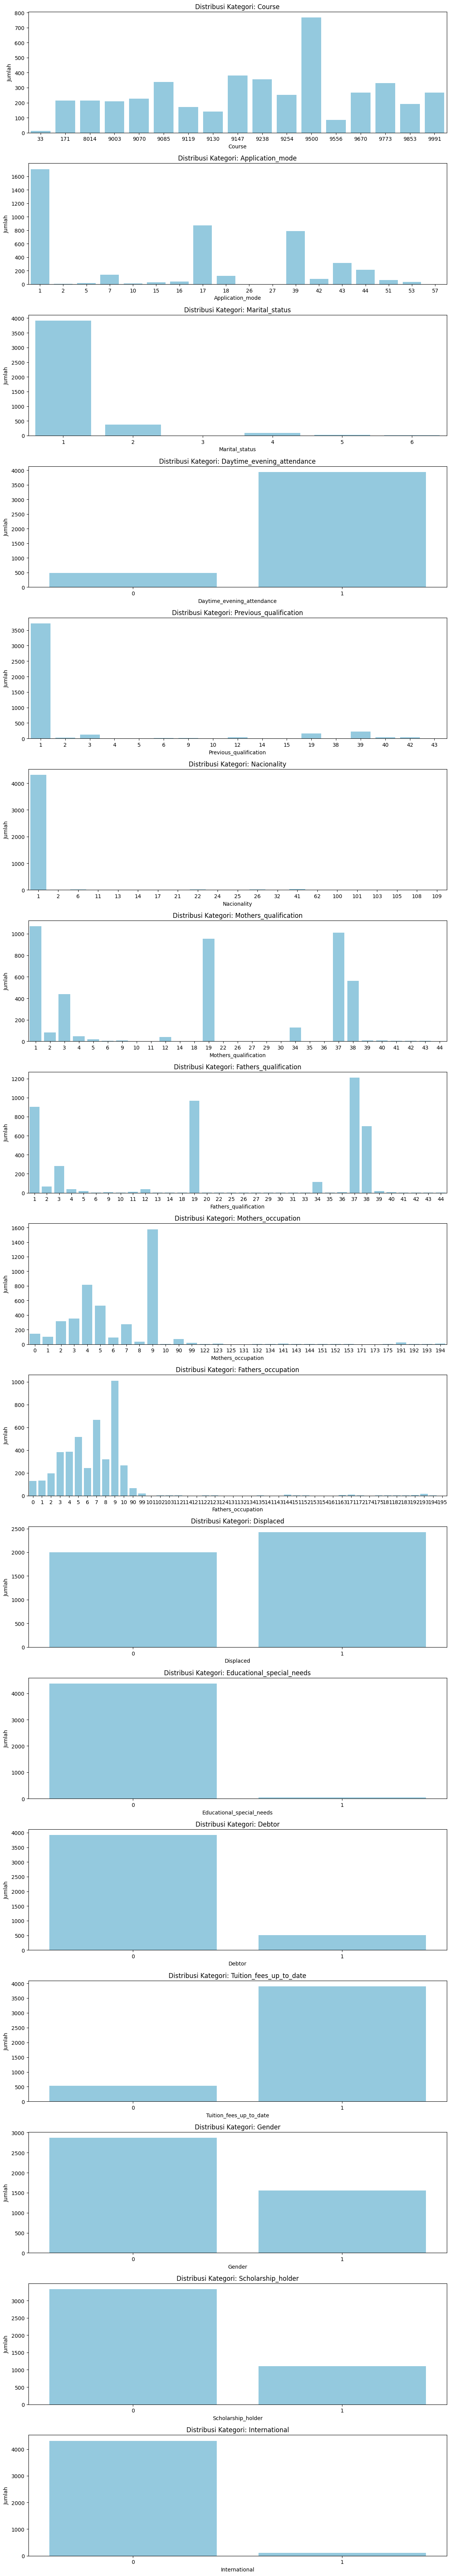

In [ ]:
# Plot distribusi kategori
num_plots = len(categorical_cols)

fig, axes = plt.subplots(nrows=num_plots, figsize=(12, 4 * num_plots))

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()

    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribusi Kategori: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Insights**: </br>
- Populasi mayoritas adalah mahasiswa lokal, laki-laki, belum menikah, belajar di malam hari.
- Kebanyakan mahasiswa berasal dari latar belakang keluarga dengan pendidikan dan pekerjaan rendah.
- Sebagian besar membayar tepat waktu dan memiliki utang.
- Penerima beasiswa dan mahasiswa dengan kebutuhan khusus cukup sedikit.
- Fitur-fitur seperti Previous_qualification, Application_mode, dan Attendance_time memiliki kemungkinan menjadi fitur penting untuk prediksi kelulusan mahasiswa.

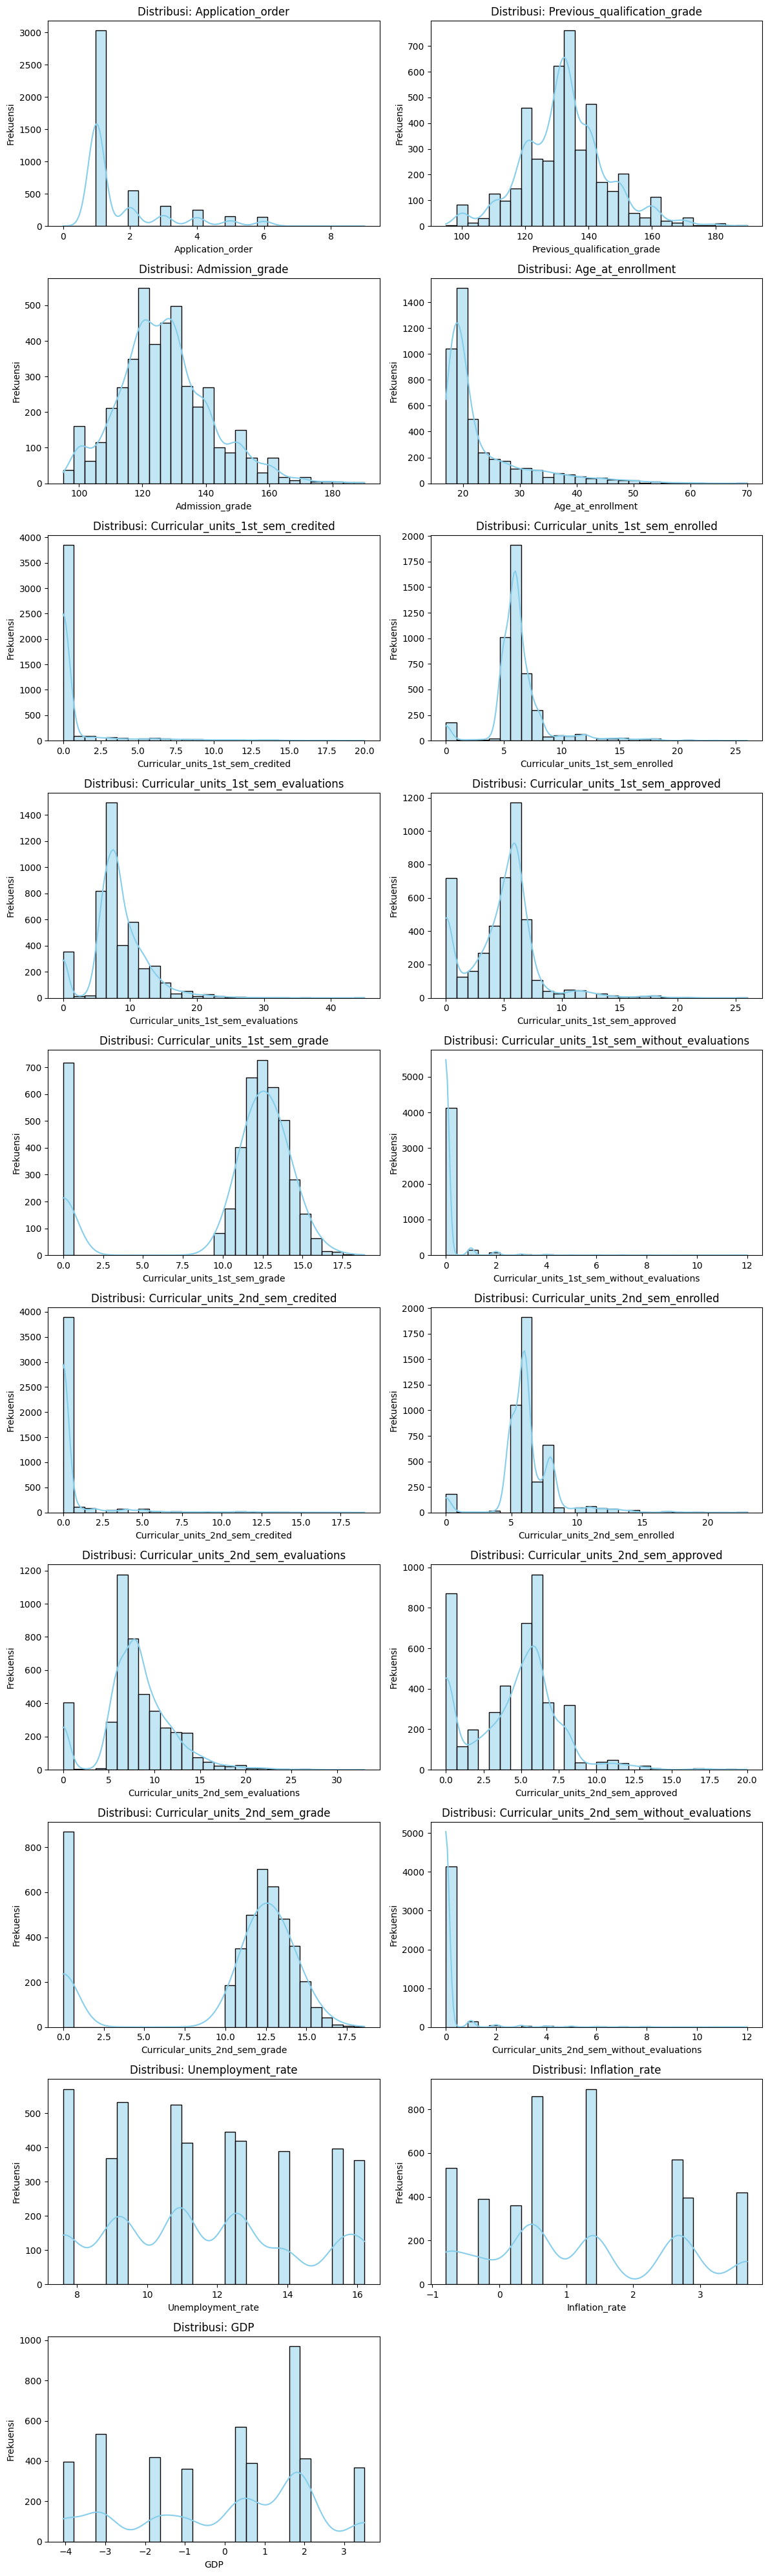

In [ ]:
# Cek distribusi numerikal data
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Plot
plt.figure(figsize=(n_cols*6, n_rows*4))

for idx, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.histplot(df[col], kde=True, bins=28, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**Insights**: </br>
- Banyak fitur menunjukkan distribusi right-skewed, artinya mayoritas data berada di nilai rendah, tetapi ada outlier bernilai tinggi.
- Fitur grade relatif simetris dan mendekati distribusi normal.
- Ada indikasi tidak aktifnya mahasiswa dalam bentuk nilai 0 yang sering muncul (terutama pada fitur credited, evaluations, dan without_evaluations).
- Beberapa distribusi menunjukkan kesenjangan besar dalam performa atau partisipasi mahasiswa.

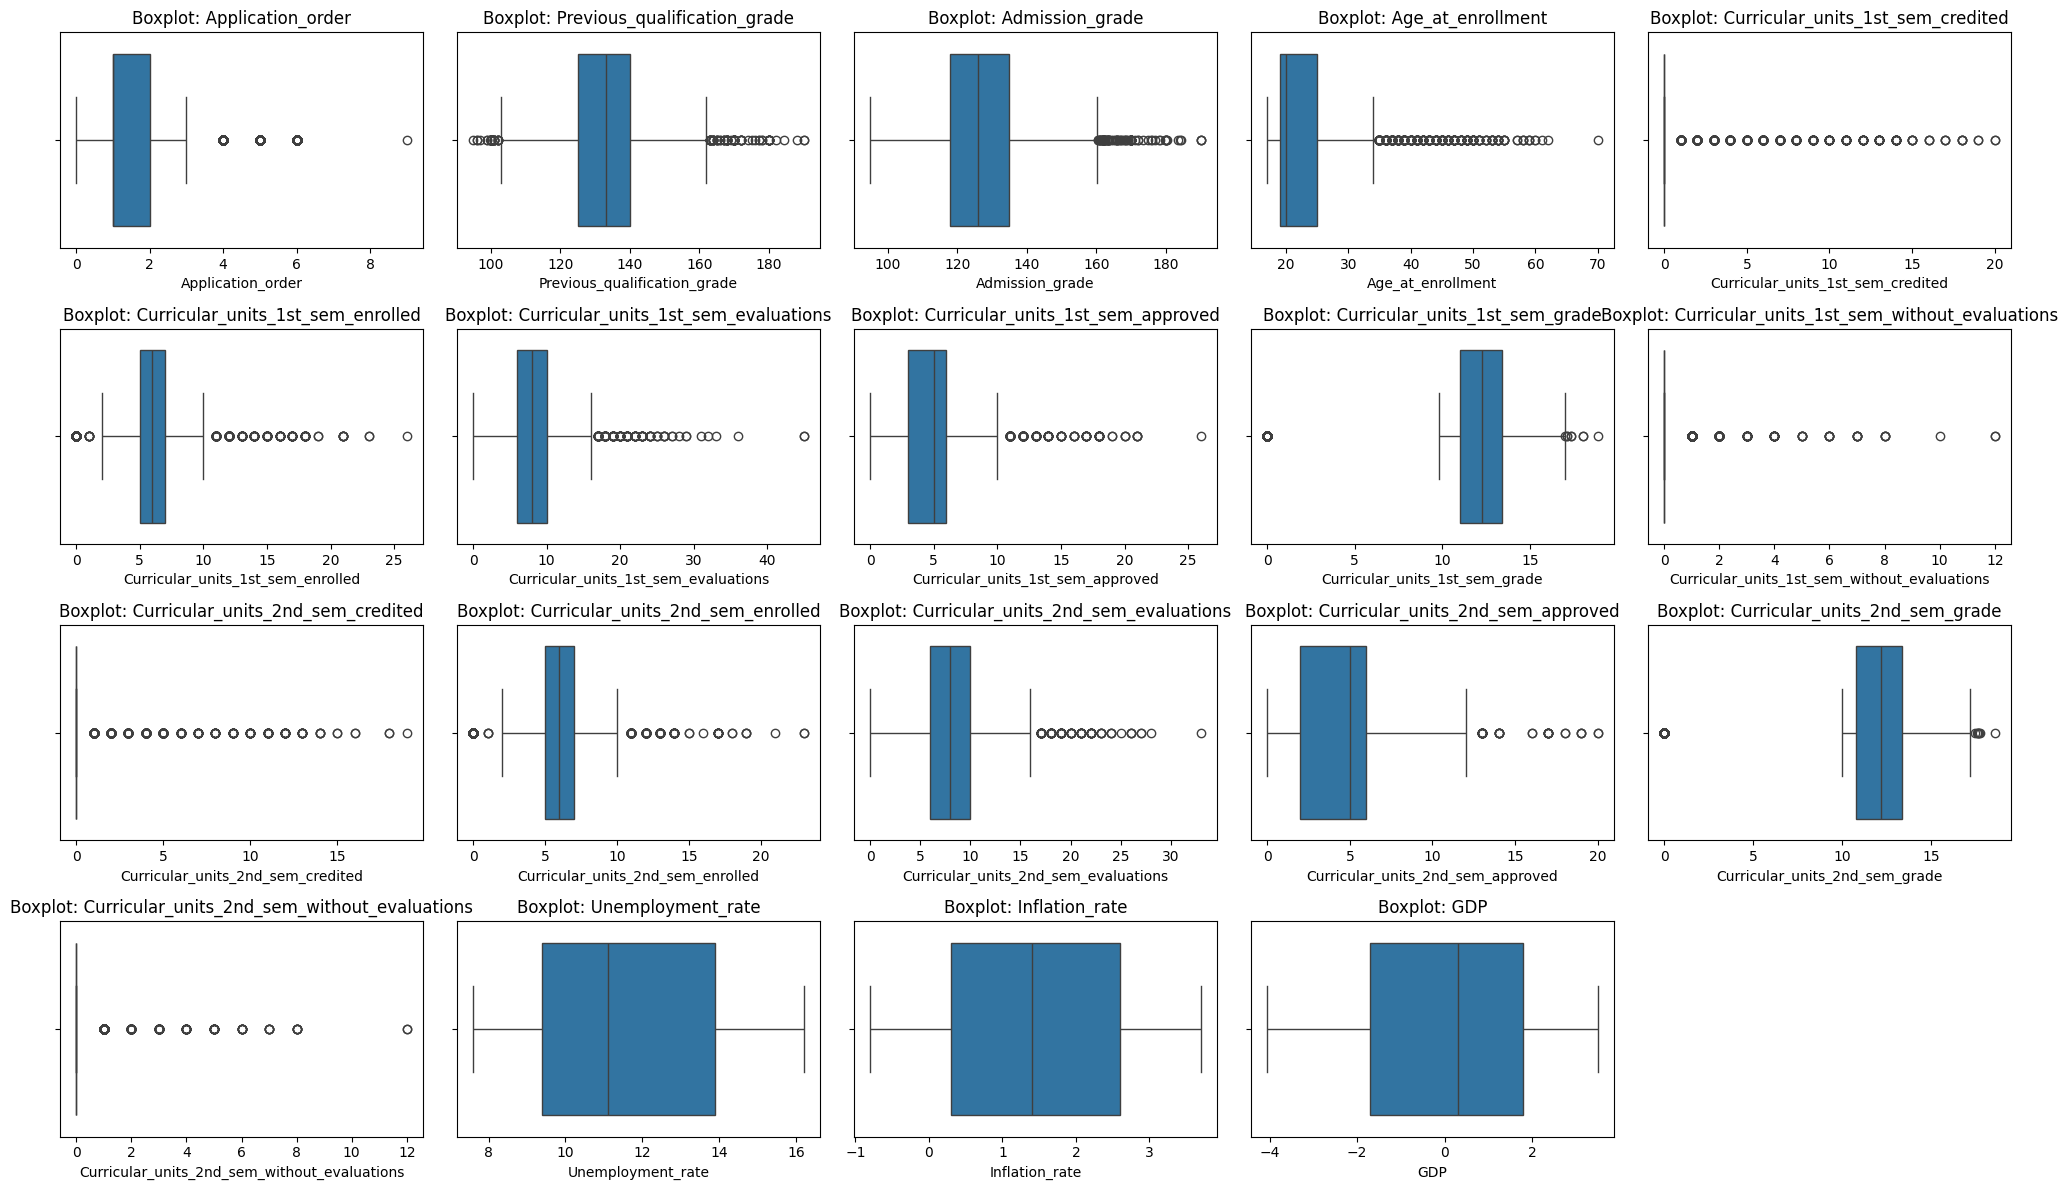

In [ ]:
# Cek outliers dengan boxplot
n = len(numerical_cols)
cols = 5
rows = math.ceil(n / cols)

plt.figure(figsize=(20, rows * 3))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot: {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Cek jumlah outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))

outliers_per_feature = outlier_mask.sum()

print("Jumlah outlier per fitur:")
print(outliers_per_feature.sort_values(ascending=False))

total_outliers = outlier_mask.sum().sum()
print(f"\nTotal jumlah outlier (sel): {total_outliers}")

Jumlah outlier per fitur:
Curricular_units_2nd_sem_grade                  877
Curricular_units_1st_sem_grade                  726
Curricular_units_1st_sem_credited               577
Application_order                               541
Curricular_units_2nd_sem_credited               530
Age_at_enrollment                               441
Curricular_units_1st_sem_enrolled               424
Curricular_units_2nd_sem_enrolled               369
Curricular_units_1st_sem_without_evaluations    294
Curricular_units_2nd_sem_without_evaluations    282
Curricular_units_1st_sem_approved               180
Previous_qualification_grade                    179
Curricular_units_1st_sem_evaluations            158
Curricular_units_2nd_sem_evaluations            109
Admission_grade                                  86
Curricular_units_2nd_sem_approved                44
Unemployment_rate                                 0
Inflation_rate                                    0
GDP                                   

In [5]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


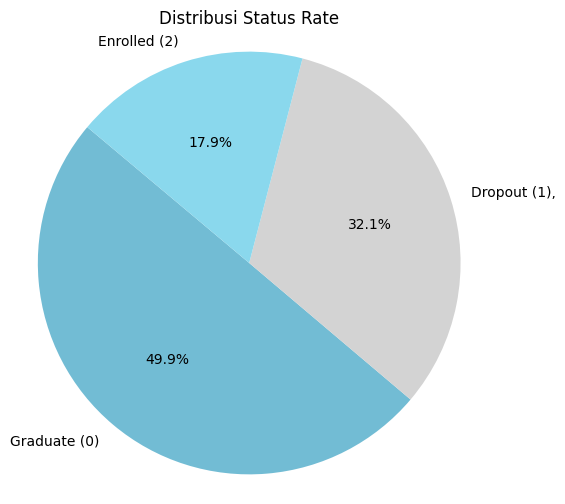

In [6]:
# Cek distribusi Status

# Hitung jumlah masing-masing kategori Status
status_counts = df['Status'].value_counts()
labels = ['Graduate (0)', 'Dropout (1),', 'Enrolled (2)']
colors = ["#72BCD4", "#D3D3D3", "#8ad8ed"]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Status Rate')
plt.axis('equal')
plt.show()

Insight: </br>
Dari hasil visualisasi di atas, persentase mahasiswa yang dropout merupakan yang terbanyak dan hampir setengahnya dari keseluruhan. Hal ini menandakan bahwa ada faktor yang menyebabkan mahasiswa gugur sebelum lulus.

#### Multivariate analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

In [ ]:
# Korelasi fitur kategorikal dengan label target 'Status'

# Menghitung jumlah kemunculan tiap kategori dalam fitur kategorikal terhadap setiap Status
for col in ["Course", "Daytime_evening_attendance", "Application_mode", "Application_order", "Marital_status", "Nacionality"]:
    print(f"\nDistribusi fitur '{col}' berdasarkan Status:")
    print(df.groupby("Status")[col].value_counts().unstack().fillna(0))



Distribusi fitur 'Course' berdasarkan Status:
Course    33  171  8014  9003  9070  9085  9119  9130  9147  9238  9254  9500  \
Status                                                                          
Dropout    8   82    71    86    51    90    92    78   134    65    96   118   
Enrolled   3   37    21    37    42    75    64    21   108    42    41   100   
Graduate   1   96   123    87   133   172    14    42   138   248   115   548   

Course    9556  9670  9773  9853  9991  
Status                                  
Dropout     33    95   101    85   136  
Enrolled    17    48    34    50    54  
Graduate    36   125   196    57    78  

Distribusi fitur 'Daytime_evening_attendance' berdasarkan Status:
Daytime_evening_attendance    0     1
Status                               
Dropout                     207  1214
Enrolled                     75   719
Graduate                    201  2008

Distribusi fitur 'Application_mode' berdasarkan Status:
Application_mode     1  2  5

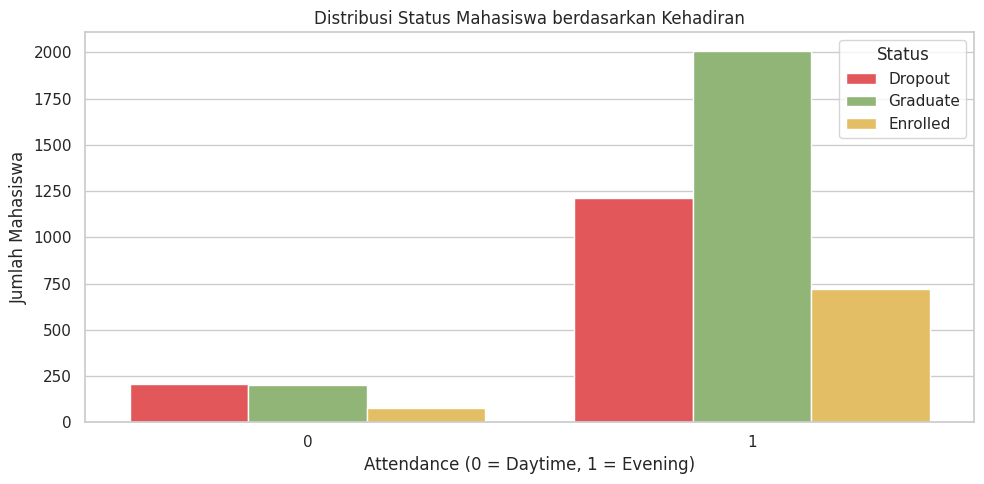

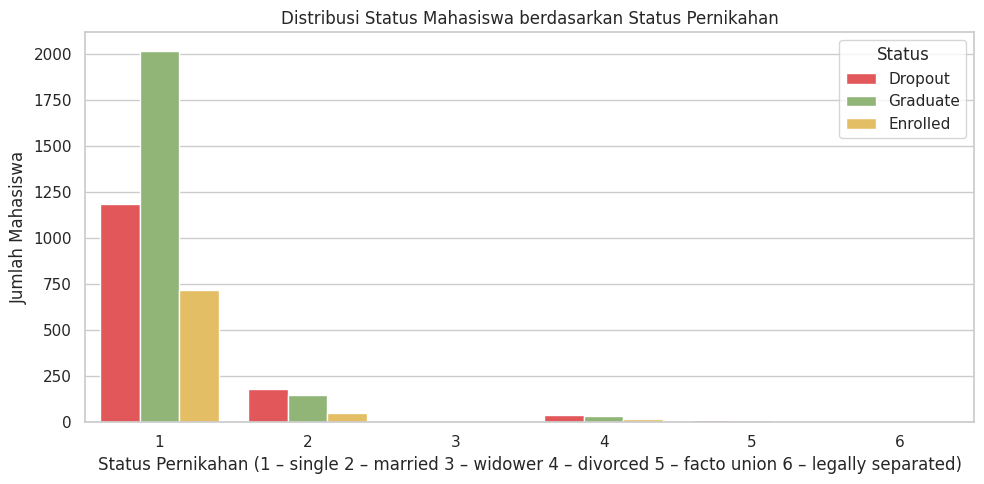

In [ ]:
# Distribusi Status Mahasiswa berdasarkan Kehadiran dan Status Pernikahan

# Palet warna pastel untuk Status
status_palette = {
    "Dropout": "#f94144",
    "Enrolled": "#f9c74f",
    "Graduate": "#90be6d"
}

# Fungsi visualisasi countplot
def plot_countplot_by_feature(df, feature_name, title=None, xlabel=None):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    sns.countplot(data=df, x=feature_name, hue="Status", palette=status_palette)

    plt.title(title or f"Distribusi Status Mahasiswa berdasarkan {feature_name}")
    plt.xlabel(xlabel or feature_name)
    plt.ylabel("Jumlah Mahasiswa")
    plt.legend(title="Status")
    plt.tight_layout()
    plt.show()

# Pemanggilan fungsi
plot_countplot_by_feature(df, "Daytime_evening_attendance",
                          "Distribusi Status Mahasiswa berdasarkan Kehadiran",
                          "Attendance (0 = Daytime, 1 = Evening)")

plot_countplot_by_feature(df, "Marital_status",
                          "Distribusi Status Mahasiswa berdasarkan Status Pernikahan",
                          "Status Pernikahan (1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated)")

Insights: </br>
- Mayoritas mahasiswa mengikuti kelas malam (evening). Dari kelompok ini, jumlah mahasiswa yang lulus (graduate) paling tinggi, diikuti oleh dropout, dan yang masih aktif (enrolled).
- Sementara pada kelas siang (daytime), jumlah mahasiswa yang dropout sedikit lebih tinggi dibanding graduate, menunjukkan bahwa jadwal kuliah siang hari bisa menjadi tantangan bagi sebagian mahasiswa.
- Sebagian besar mahasiswa berstatus belum menikah (single). Dari kelompok ini, mayoritas berhasil menyelesaikan studi (graduate), diikuti oleh dropout.
- Pada mahasiswa yang sudah menikah (married), jumlah dropout lebih tinggi dibanding graduate, yang bisa mengindikasikan bahwa tanggung jawab rumah tangga dapat memengaruhi keberhasilan studi.
- Status pernikahan lain seperti divorced, widower, dan legally separated sangat sedikit jumlahnya, sehingga tidak bisa dijadikan acuan umum.

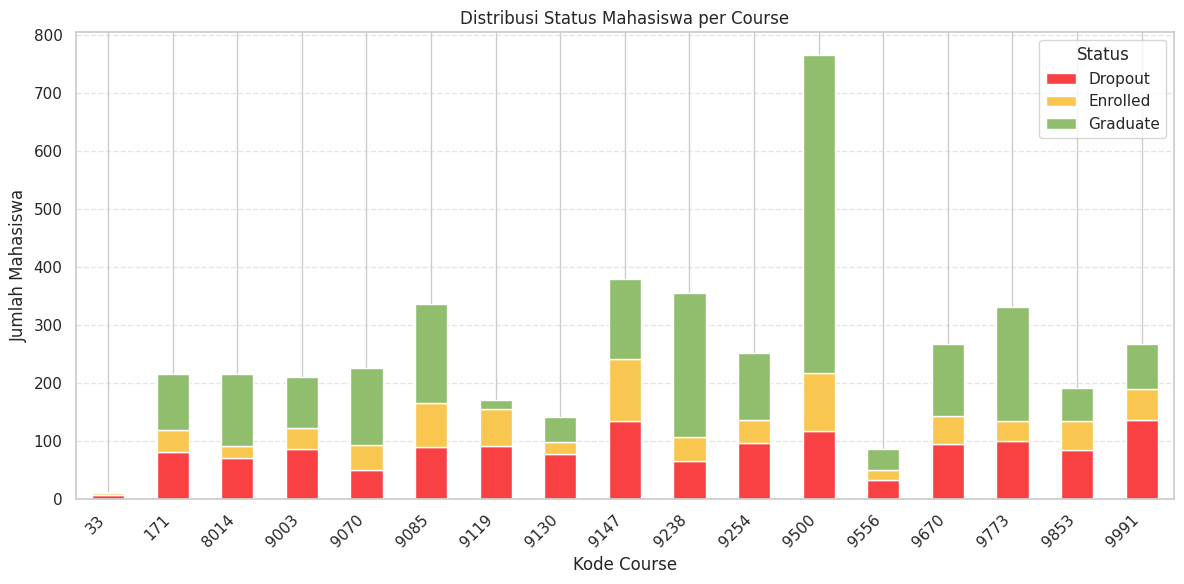

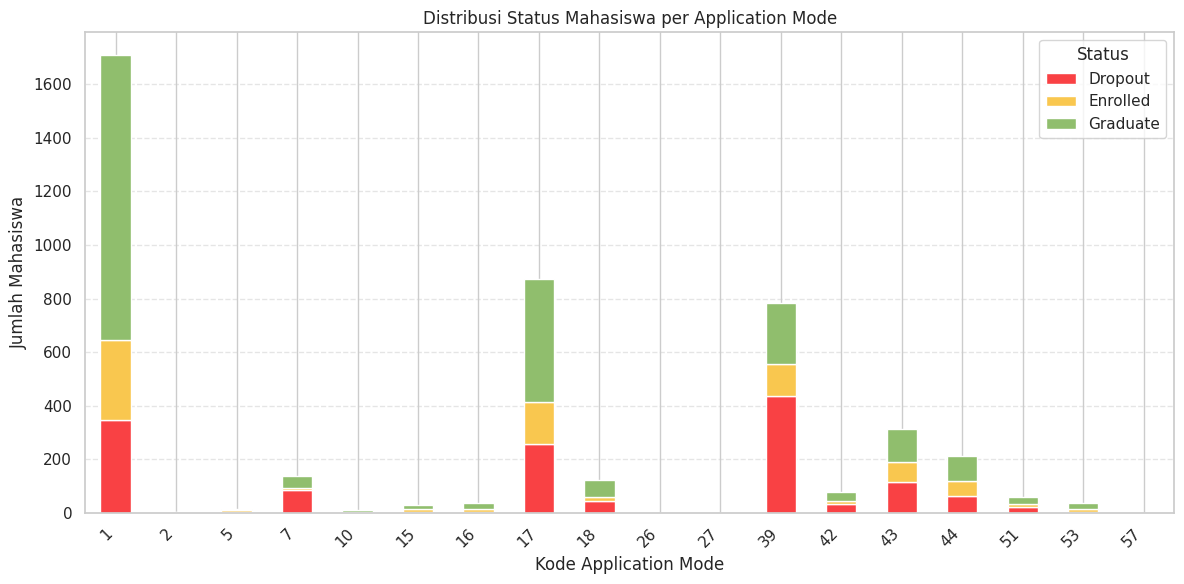

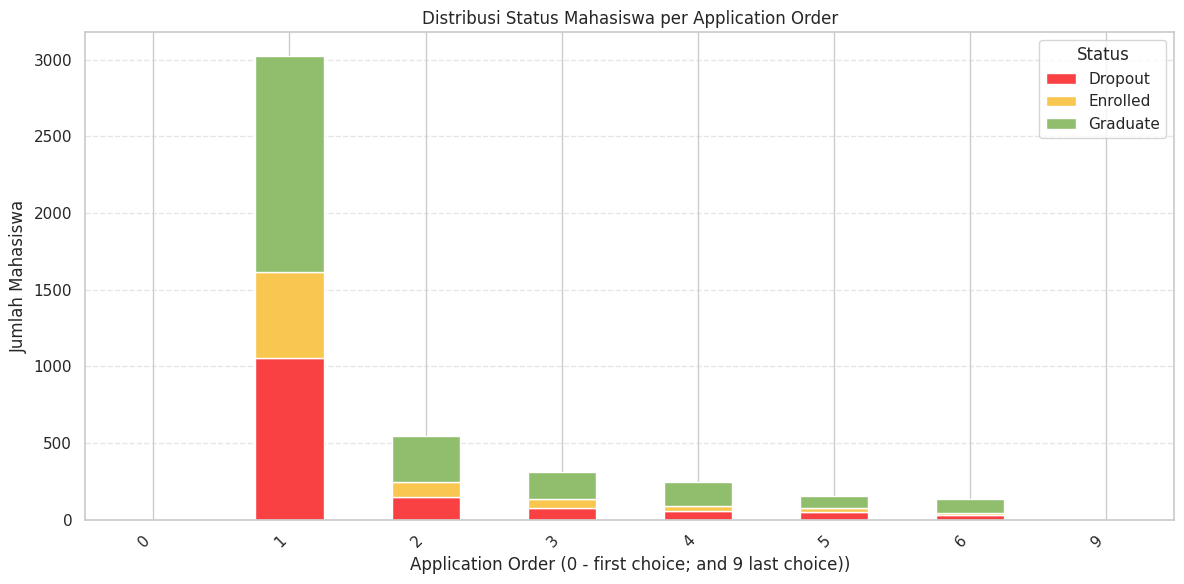

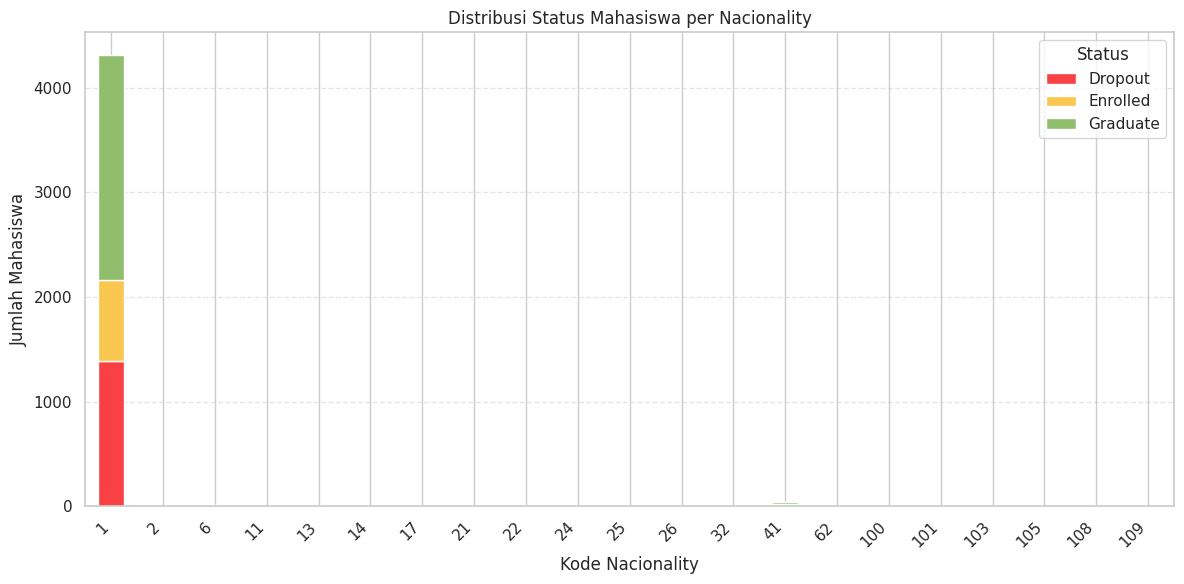

In [ ]:
# Distirbusi Status berdasarkan Coursem Application mode, application order, dan nacionality

# Fungsi visualisasi
def plot_stacked_bar_by_feature(df, feature_name, title=None, xlabel=None):
    ct = pd.crosstab(df[feature_name], df['Status'])
    pastel_colors = [status_palette[status] for status in ct.columns]

    ct.plot(kind='bar', stacked=True, figsize=(12, 6), color=pastel_colors)

    plt.title(title or f"Distribusi Status Mahasiswa per {feature_name}")
    plt.ylabel("Jumlah Mahasiswa")
    plt.xlabel(xlabel or feature_name)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title="Status")
    plt.tight_layout()
    plt.show()

#Vsualisasi masing-masing fitur
plot_stacked_bar_by_feature(df, 'Course', "Distribusi Status Mahasiswa per Course", "Kode Course")
plot_stacked_bar_by_feature(df, 'Application_mode', "Distribusi Status Mahasiswa per Application Mode", "Kode Application Mode")
plot_stacked_bar_by_feature(df, 'Application_order', "Distribusi Status Mahasiswa per Application Order", "Application Order (0 - first choice; and 9 last choice))")
plot_stacked_bar_by_feature(df, 'Nacionality', "Distribusi Status Mahasiswa per Nacionality", "Kode Nacionality")

**Insights**: </br>
- Mahasiswa dari kode course 9500 paling banyak lulus. Sedangkan pada course lainlebih sedikit tidak sampai 400 jumlahnya. Ini menandakan bahwa course lain kurang diminati atau sulit untuk lulus. Untuk dropout tertinggi ada pada course dengan kode 9147 dan 9991.
- Mahasiswa paling banyak lulus melalui application mode 1. Sedangkan yang dropout pada application mode 39.
- Distribusi terbanyak ada pada application order second choice baik pada graduated, dropout, dan enrolled.
- Semua mahasiswa mempunyai nacionality kode 1.

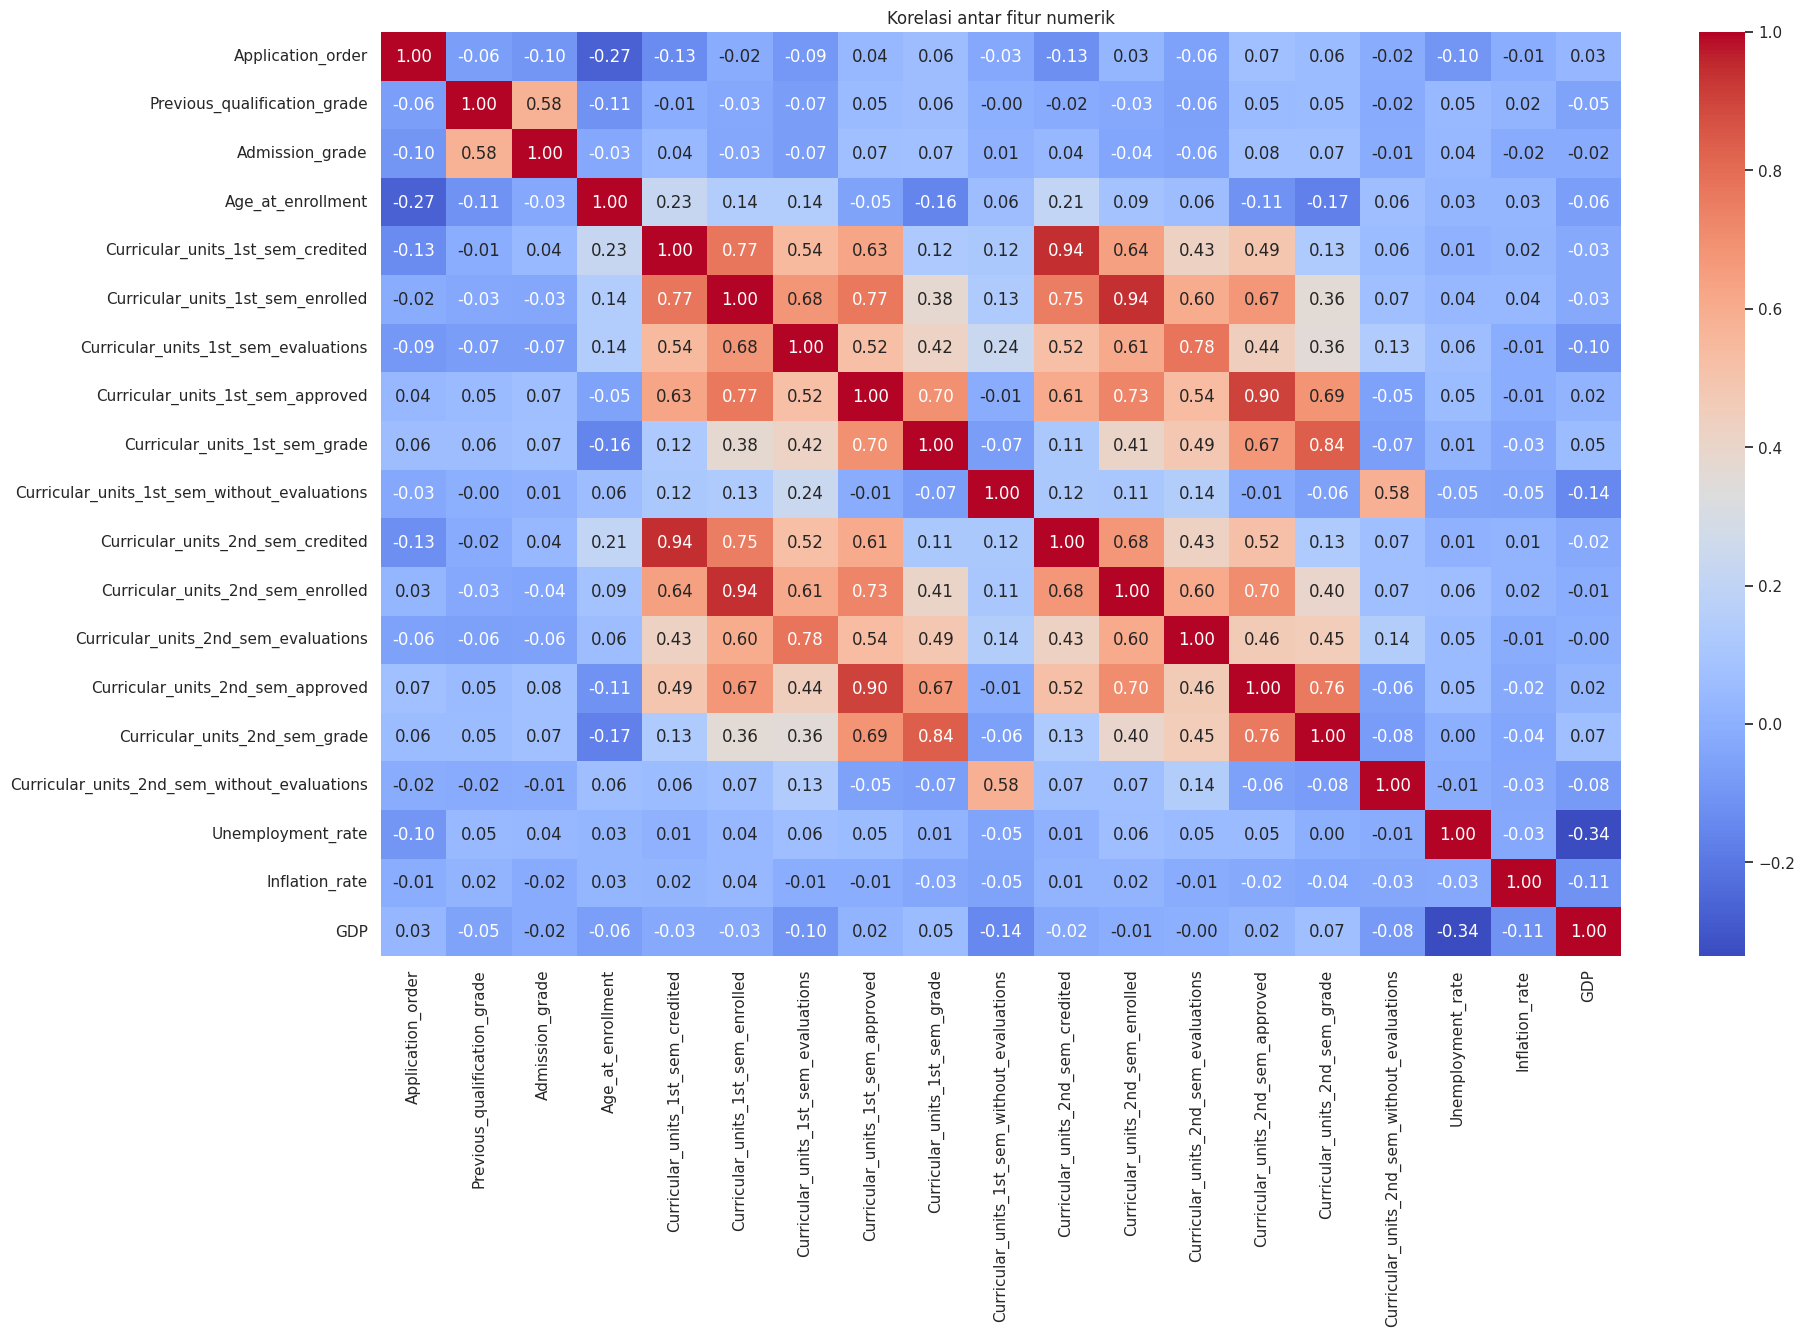

In [ ]:
# Korelasi antar kolom numerik
plt.figure(figsize=(20, 12))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar fitur numerik')
plt.show()

Insights:
- Fitur-fitur akademik seperti Curricular_units_credited, enrolled, approved, dan grade menunjukkan korelasi yang sangat kuat satu sama lain, baik pada semester pertama maupun kedua (korelasi ≥ 0.75). Hal ini mencerminkan bahwa semakin banyak mata kuliah yang diambil dan dikreditkan, kemungkinan besar nilai akhir mahasiswa juga lebih tinggi.
- Fitur Unemployment_rate berkorelasi negatif dengan GDP sebesar -0.34, yang sesuai secara ekonomi (semakin tinggi pengangguran, semakin rendah GDP).
- Age_at_enrollment memiliki korelasi sangat rendah dengan sebagian besar fitur akademik, menunjukkan bahwa usia saat masuk kuliah tidak terlalu memengaruhi performa akademik dalam data ini.

## Data Preparation / Preprocessing

Pada data preparation dilakukan beberapa tahapan berikut:
1. Feature Engineering:
Melakukan mapping pada kolom kategorikal untuk mengubah kode numerik menjadi label yang sesuai. Selain itu, juga dilakukan pembuatan fitur baru berupa rata-rata nilai dari dua semester. Juga dilakukan pembuatan fitur baru berupa approval rate dan credit rate. Binerisasi fitur Displaced, Educational_special_needs, Debtor, Tuition_fees_up_to_date, Scholarship_holder, dan International. Hasil transformasi ini juga disimpan ke dalam file .csv untuk keperluan analisis lanjutan seperti visualisasi atau dashboard.

2. Outlier Handling:
Menggunakan metode IQR clipping untuk menangani outlier. Metode ini mempertahankan menghapus nilai pada batas-batas tertentu yaitu Q1 dan Q3.

3. Mengubah tipe data menjadi int:
Pada fitur curricular units 1st sem approved, tipe datanya diubah menjadi int agar konsisten penggunaannya dan tidak ada SKS koma.

4. Feature Selection:
  - Memilih fitur berdasarkan asumsi fitur yang paling berpengaruh pada label target 'Status'.
  - Chi-Square Test digunakan untuk menilai pentingnya fitur kategorikal terhadap target variabel.
  - T-Test digunakan untuk mengevaluasi pengaruh fitur numerikal terhadap target.
  - ANOVA untuk mengetahui fitur utama yang paling relevan dengan label target.

5. Train-Test Split:
Membagi data menjadi data latih dan data uji untuk proses modeling dan evaluasi.

6. One-Hot Encoding:
Melakukan one-hot encoding pada fitur kategorikal.

7. Standardization:
Melakukan standardization pada fitur numerikal agar model dapat berfungsi optimal, terutama pada algoritma yang sensitif terhadap skala fitur.

8. SMOTE:
Oversampling untuk menangani imbalanced data yang dilakukan pada data training agar menghindari data leakage.

In [ ]:
preparation_df = df.copy()

In [ ]:
preparation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

In [ ]:
# Feature engineering

# Mapping dictionary
marital_status_map = {
    1: "Single", 2: "Married", 3: "Widower", 4: "Divorced",
    5: "Facto union", 6: "Legally separated"
}

application_mode_map = {
    1: "1st phase - general contingent", 2: "Ordinance No. 612/93", 5: "1st phase - special (Azores)",
    7: "Other higher courses", 10: "Ordinance No. 854-B/99", 15: "International bachelor",
    16: "1st phase - special (Madeira)", 17: "2nd phase - general", 18: "3rd phase - general",
    26: "Ordinance 533-A/99 b2", 27: "Ordinance 533-A/99 b3", 39: "Over 23 years old",
    42: "Transfer", 43: "Change of course", 44: "Diploma holders",
    51: "Change institution/course", 53: "Short cycle diploma", 57: "Change inst/course (Intl)"
}

course_map = {
    33: "Biofuel Tech", 171: "Multimedia Design", 8014: "Social Service (Evening)",
    9003: "Agronomy", 9070: "Comm Design", 9085: "Vet Nursing", 9119: "Informatics Eng",
    9130: "Equinculture", 9147: "Management", 9238: "Social Service", 9254: "Tourism",
    9500: "Nursing", 9556: "Oral Hygiene", 9670: "Marketing", 9773: "Journalism",
    9853: "Basic Education", 9991: "Management (Evening)"
}

attendance_map = {1: "Daytime", 0: "Evening"}

prev_qualification_map = {
    1: "Secondary education", 2: "Bachelor", 3: "Degree", 4: "Master",
    5: "Doctorate", 6: "Ongoing Higher Ed", 9: "12th not completed", 10: "11th not completed",
    12: "Other 11th", 14: "10th", 15: "10th not completed", 19: "Basic Ed 3rd cycle",
    38: "Basic Ed 2nd cycle", 39: "Tech course", 40: "Higher Ed 1st cycle",
    42: "Prof Tech Course", 43: "Higher Ed Master"
}

nationality_map = {
    1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch", 14: "English",
    17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean", 24: "Guinean", 25: "Mozambican",
    26: "Santomean", 32: "Turkish", 41: "Brazilian", 62: "Romanian", 100: "Moldovan",
    101: "Mexican", 103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian"
}

mother_qualification_map = {
    1: "Sec Ed 12th", 2: "Bachelor", 3: "Degree", 4: "Master", 5: "Doctorate",
    6: "Ongoing HE", 9: "12th not completed", 10: "11th not completed", 11: "7th old",
    12: "Other 11th", 14: "10th", 18: "General commerce", 19: "Basic Ed 3rd cycle",
    22: "Technical-prof course", 26: "7th", 27: "2nd general HS", 29: "9th not completed",
    30: "8th", 34: "Unknown", 35: "Illiterate", 36: "Can read (no school)", 37: "Basic Ed 1st",
    38: "Basic Ed 2nd", 39: "Tech spec course", 40: "HE Degree 1st", 41: "Specialized HE",
    42: "Prof HE", 43: "HE Master", 44: "HE Doctorate", 44: "HE Doctorate"
}

father_qualification_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.", 2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree", 4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed", 10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)", 12: "Other - 11th Year of Schooling", 13: "2nd Year Complementary High School Course",
    14: "10th Year of Schooling", 18: "General Commerce Course", 19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course", 22: "Technical-professional Course", 25: "Complementary High School Course - Not Concluded",
    26: "7th Year of Schooling", 27: "2nd Cycle of the General High School Course", 29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling", 31: "General Course of Administration and Commerce", 33: "Supplementary Accounting and Administration",
    34: "Unknown", 35: "Can't Read or Write", 36: "Can Read Without 4th Year of Schooling", 37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 39: "Technological Specialization Course", 40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course", 42: "Professional Higher Technical Course", 43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

mother_occupation_map = {
    0: "Student", 1: "Executive", 2: "Scientist", 3: "Technician", 4: "Admin staff",
    5: "Services/Security", 6: "Farmer/Fisher", 7: "Industry Worker", 8: "Machine Operator",
    9: "Unskilled", 10: "Military", 90: "Other", 99: "Blank", 122: "Health Prof",
    123: "Teacher", 125: "ICT Specialist", 131: "Tech - Sci/Eng", 132: "Tech - Health",
    134: "Tech - Legal/Social", 141: "Secretary/Clerk", 143: "Finance/Admin",
    144: "Other Admin", 151: "Service Worker", 152: "Seller", 153: "Care Worker",
    171: "Construction", 173: "Printing/Jeweler/Artisan", 175: "Food/Wood/Clothes",
    191: "Cleaner", 192: "Unskilled - Agriculture", 193: "Unskilled - Industry",
    194: "Meal Assistant"
}

father_occupation_map = {
    0: "Student", 1: "Legislative/Executive Power, Directors, Executive Managers", 2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions", 4: "Administrative Staff", 5: "Personal Services, Security, Sellers",
    6: "Farmers and Skilled Agriculture/Fisheries Workers", 7: "Skilled Industry/Construction/Crafts Workers", 8: "Machine Operators and Assemblers",
    9: "Unskilled Workers", 10: "Armed Forces Professions", 90: "Other Situation", 99: "Blank", 101: "Armed Forces Officers", 102: "Armed Forces Sergeants",
    103: "Other Armed Forces Personnel", 112: "Admin/Commercial Services Directors", 114: "Hotel/Catering/Trade Services Directors",
    121: "Specialists - Physical Sciences, Engineering, etc.", 122: "Health Professionals", 123: "Teachers", 124: "Specialists - Finance, Admin, Public Relations",
    131: "Intermediate Science and Engineering Technicians", 132: "Intermediate Health Technicians", 134: "Intermediate Legal, Social, Cultural Technicians",
    135: "ICT Technicians", 141: "Office Workers, Secretaries, Data Operators", 143: "Operators - Financial, Registry, etc.",
    144: "Other Administrative Support Staff", 151: "Personal Service Workers", 152: "Sellers", 153: "Personal Care Workers",
    154: "Protection and Security Services", 161: "Market-oriented Skilled Farmers", 163: "Subsistence Farmers, Fishermen, Hunters",
    171: "Construction Workers (except Electricians)", 172: "Metalworking and Similar Workers", 174: "Electricity and Electronics Workers",
    175: "Food Processing, Woodworking, Clothing Craftsmen", 181: "Fixed Plant and Machine Operators", 182: "Assembly Workers",
    183: "Vehicle Drivers and Mobile Equipment Operators", 192: "Unskilled Agriculture, Fisheries, Forestry Workers",
    193: "Unskilled Industry, Construction, Transport Workers", 194: "Meal Preparation Assistants", 195: "Street Vendors and Service Providers"
}

# Biner sederhana
binary_map = {1: "Yes", 0: "No"}
gender_map = {1: "Male", 0: "Female"}

# Membuat fitur baru
preparation_df['avg_grade'] = (preparation_df['Curricular_units_1st_sem_grade'] + preparation_df['Curricular_units_2nd_sem_grade']) / 2
preparation_df['credit_rate_1st'] = preparation_df['Curricular_units_1st_sem_credited'] / (preparation_df['Curricular_units_1st_sem_enrolled'] + 1)
preparation_df['credit_rate_2nd'] = preparation_df['Curricular_units_2nd_sem_credited'] / (preparation_df['Curricular_units_1st_sem_enrolled'] + 1)

# Menerapkan mapping
preparation_df["Marital_status"] = preparation_df["Marital_status"].map(marital_status_map)
preparation_df["Application_mode"] = preparation_df["Application_mode"].map(application_mode_map)
preparation_df["Course"] = preparation_df["Course"].map(course_map)
preparation_df["Daytime_evening_attendance"] = preparation_df["Daytime_evening_attendance"].map(attendance_map)
preparation_df["Previous_qualification"] = preparation_df["Previous_qualification"].map(prev_qualification_map)
preparation_df["Nacionality"] = preparation_df["Nacionality"].map(nationality_map)
preparation_df["Mothers_qualification"] = preparation_df["Mothers_qualification"].map(mother_qualification_map)
preparation_df["Fathers_qualification"] = preparation_df["Fathers_qualification"].map(father_qualification_map)
preparation_df["Mothers_occupation"] = preparation_df["Mothers_occupation"].map(mother_occupation_map)
preparation_df["Fathers_occupation"] = preparation_df["Fathers_occupation"].map(father_occupation_map)
preparation_df["Displaced"] = preparation_df["Displaced"].map(binary_map)
preparation_df["Educational_special_needs"] = preparation_df["Educational_special_needs"].map(binary_map)
preparation_df["Debtor"] = preparation_df["Debtor"].map(binary_map)
preparation_df["Tuition_fees_up_to_date"] = preparation_df["Tuition_fees_up_to_date"].map(binary_map)
preparation_df["Gender"] = preparation_df["Gender"].map(gender_map)
preparation_df["Scholarship_holder"] = preparation_df["Scholarship_holder"].map(binary_map)
preparation_df["International"] = preparation_df["International"].map(binary_map)

In [ ]:
preparation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

In [ ]:
# Menyimpan dataset ke file csv untuk keperluan dashboard analysis
preparation_df.to_csv('students_clean.csv', index=False)

In [ ]:
# Cek jumlah outliers
numerical_update = preparation_df.select_dtypes(include=['int64', 'float64']).columns

Q1 = preparation_df[numerical_update].quantile(0.25)
Q3 = preparation_df[numerical_update].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (preparation_df[numerical_update] < (Q1 - 1.5 * IQR)) | (preparation_df[numerical_update] > (Q3 + 1.5 * IQR))

outliers_per_feature = outlier_mask.sum()

print("Jumlah outlier per fitur:")
print(outliers_per_feature.sort_values(ascending=False))

total_outliers = outlier_mask.sum().sum()
print(f"\nTotal jumlah outlier (sel): {total_outliers}")

Jumlah outlier per fitur:
avg_grade                                       920
Curricular_units_2nd_sem_grade                  877
Curricular_units_1st_sem_grade                  726
credit_rate_1st                                 577
Curricular_units_1st_sem_credited               577
Application_order                               541
credit_rate_2nd                                 530
Curricular_units_2nd_sem_credited               530
Age_at_enrollment                               441
Curricular_units_1st_sem_enrolled               424
Curricular_units_2nd_sem_enrolled               369
Curricular_units_1st_sem_without_evaluations    294
Curricular_units_2nd_sem_without_evaluations    282
Curricular_units_1st_sem_approved               180
Previous_qualification_grade                    179
Curricular_units_1st_sem_evaluations            158
Curricular_units_2nd_sem_evaluations            109
Admission_grade                                  86
Curricular_units_2nd_sem_approved     

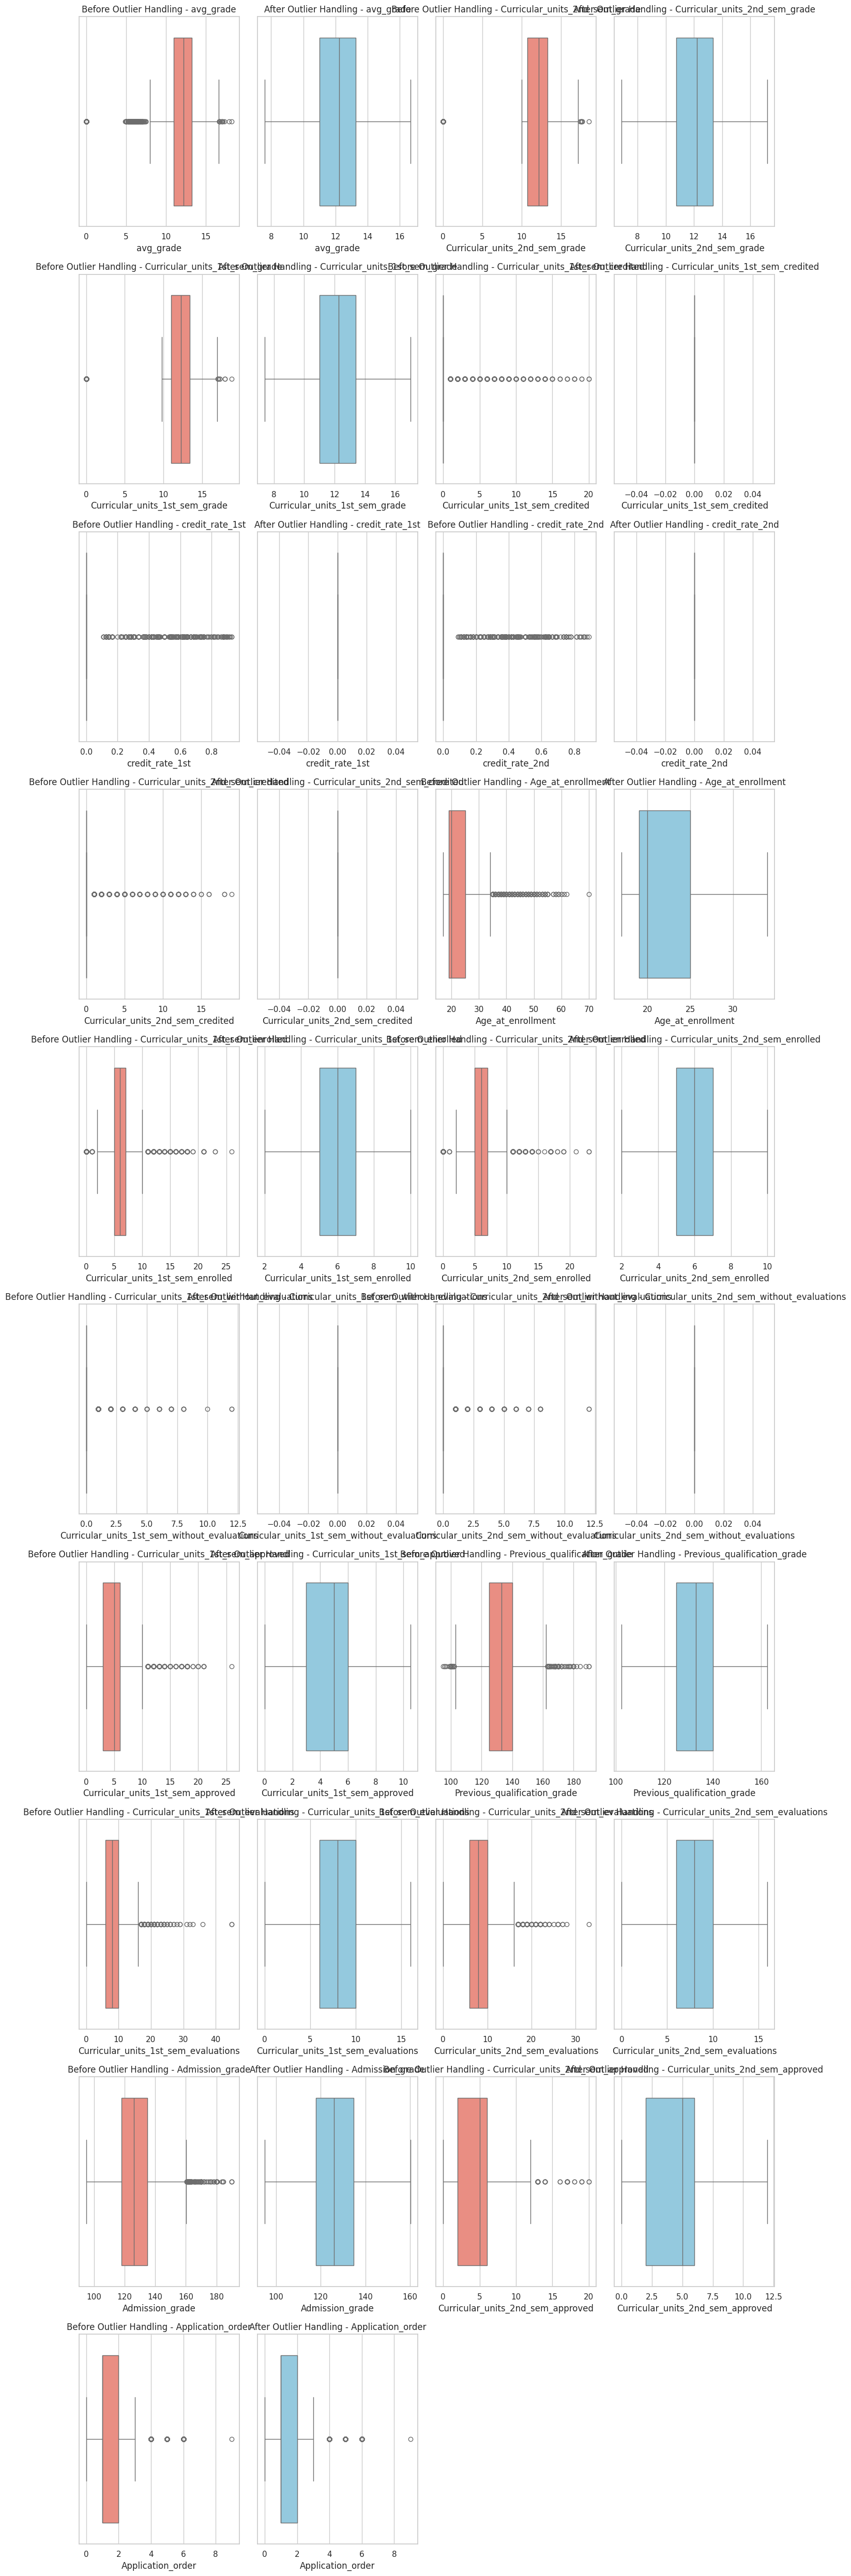

In [ ]:
# Menyalin dataframe dulu biar bisa dibandingkan
df_cleaned = preparation_df.copy()

# Kolom yang ingin ditangani outliers-nya
cols_with_outliers = [
    'avg_grade',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_credited',
    'credit_rate_1st',
    'credit_rate_2nd',
    'Curricular_units_2nd_sem_credited',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_without_evaluations',
    'Curricular_units_1st_sem_approved',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_2nd_sem_evaluations',
    'Admission_grade',
    'Curricular_units_2nd_sem_approved'
]

# Tangani application_order (0-9 valid range)
df_cleaned['Application_order'] = df_cleaned['Application_order'].clip(lower=0, upper=9).astype(int)

# Handling outliers menggunakan metode IQR
for col in cols_with_outliers:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Visualisasi sebelum dan sesudah handling outliers
n_cols = 2
cols_visualize = cols_with_outliers + ['Application_order']
n_rows = (len(cols_visualize) + 1) // n_cols

plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(cols_visualize):
    # Sebelum IQR clipping
    plt.subplot(n_rows, n_cols * 2, i * 2 + 1)
    sns.boxplot(x=preparation_df[col], color='salmon')
    plt.title(f"Before Outlier Handling - {col}")

    # Setelah IQR clipping
    plt.subplot(n_rows, n_cols * 2, i * 2 + 2)
    sns.boxplot(x=df_cleaned[col], color='skyblue')
    plt.title(f"After Outlier Handling - {col}")

plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Application_order,4424.0,1.727848,1.313793,0.000,1.00,1.000000,2.000000,9.000000
Previous_qualification_grade,4424.0,132.501831,12.592465,102.500,125.00,133.100000,140.000000,162.500000
Admission_grade,4424.0,126.808816,13.996731,95.000,117.90,126.100000,134.800000,160.150000
Age_at_enrollment,4424.0,22.457052,5.409813,17.000,19.00,20.000000,25.000000,34.000000
Curricular_units_1st_sem_credited,4424.0,0.000000,0.000000,0.000,0.00,0.000000,0.000000,0.000000
Curricular_units_1st_sem_enrolled,4424.0,6.146022,1.578002,2.000,5.00,6.000000,7.000000,10.000000
Curricular_units_1st_sem_evaluations,4424.0,8.136528,3.673159,0.000,6.00,8.000000,10.000000,16.000000
Curricular_units_1st_sem_approved,4424.0,4.583635,2.726349,0.000,3.00,5.000000,6.000000,10.500000
Curricular_units_1st_sem_grade,4424.0,11.840735,2.308755,7.400,11.00,12.285714,13.400000,17.000000
Curricular_units_1st_sem_without_evaluations,4424.0,0.000000,0.000000,0.000,0.00,0.000000,0.000000,0.000000


In [ ]:
df_cleaned.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,avg_grade,credit_rate_1st,credit_rate_2nd
0,Single,2nd phase - general,5,Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd cycle,Other - 11th Year of Schooling,...,0,6.875000,0,10.8,1.4,1.74,Dropout,7.600000,0.0,0.0
1,Single,International bachelor,1,Tourism,Daytime,Secondary education,160.0,Portuguese,Sec Ed 12th,Higher Education - Degree,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,13.833333,0.0,0.0
2,Single,1st phase - general contingent,5,Comm Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 1st,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6.875000,0,10.8,1.4,1.74,Dropout,7.600000,0.0,0.0
3,Single,2nd phase - general,2,Journalism,Daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,12.914286,0.0,0.0
4,Married,Over 23 years old,1,Social Service (Evening),Evening,Secondary education,102.5,Portuguese,Basic Ed 1st,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,12.666667,0.0,0.0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

Pada fitur curricular units 1st sem approved, tipe datanya diubah menjadi int agar konsisten penggunaannya dan tidak ada SKS koma.

In [ ]:
# Mengubah tipe data menjadi int
df_cleaned['Curricular_units_1st_sem_approved'] = df_cleaned['Curricular_units_1st_sem_approved'].astype(int)

In [ ]:
# Feature selection berdaasarkan asumsi fitur paling berpengaruh dengan label target

selected_features = ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Age_at_enrollment',
                     'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                     'Scholarship_holder', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
                     'avg_grade', 'credit_rate_1st', 'credit_rate_2nd', 'Status']

In [ ]:
# Target
target = 'Status'

# Kolom kategorikal dan numerikal
categorical_cols = df_cleaned[selected_features].select_dtypes(include=['category']).columns.tolist()
numerical_cols = df_cleaned[selected_features].select_dtypes(include=['float64']).columns.tolist()

print("=== CHI-SQUARE TEST ===")
for col in categorical_cols:
    try:
        contingency_table = pd.crosstab(df_cleaned[target], df_cleaned[col])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"{col}: p-value = {p:.5f} {'< 0.05 ✅' if p < 0.05 else '>= 0.05 ❌'}")
    except Exception as e:
        print(f"{col}: Error - {e}")

print("\n=== T-TEST ===")
# Pastikan target hanya 2 kelas agar t-test valid
if df_cleaned[target].nunique() == 2:
    classes = df_cleaned[target].unique()
    for col in numerical_cols:
        try:
            group1 = df_cleaned[df_cleaned[target] == classes[0]][col]
            group2 = df_cleaned[df_cleaned[target] == classes[1]][col]
            t_stat, p = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
            print(f"{col}: p-value = {p:.5f} {'< 0.05 ✅' if p < 0.05 else '>= 0.05 ❌'}")
        except Exception as e:
            print(f"{col}: Error - {e}")
else:
    print("Target Status memiliki lebih dari 2 kelas. T-test hanya valid untuk 2 kelas.")

print("\n=== ANOVA TEST ===")
for col in numerical_cols:
    try:
        groups = [df_cleaned[df_cleaned[target] == cls][col].dropna() for cls in df_cleaned[target].unique()]
        f_stat, p = f_oneway(*groups)
        print(f"{col}: p-value = {p:.5f} {'< 0.05 ✅' if p < 0.05 else '>= 0.05 ❌'}")
    except Exception as e:
        print(f"{col}: Error - {e}")


=== CHI-SQUARE TEST ===
Marital_status: p-value = 0.00000 < 0.05 ✅
Application_mode: p-value = 0.00000 < 0.05 ✅
Course: p-value = 0.00000 < 0.05 ✅
Daytime_evening_attendance: p-value = 0.00000 < 0.05 ✅
Debtor: p-value = 0.00000 < 0.05 ✅
Tuition_fees_up_to_date: p-value = 0.00000 < 0.05 ✅
Gender: p-value = 0.00000 < 0.05 ✅
Scholarship_holder: p-value = 0.00000 < 0.05 ✅

=== T-TEST ===
Target Status memiliki lebih dari 2 kelas. T-test hanya valid untuk 2 kelas.

=== ANOVA TEST ===
Curricular_units_1st_sem_grade: p-value = 0.00000 < 0.05 ✅
Curricular_units_2nd_sem_grade: p-value = 0.00000 < 0.05 ✅
avg_grade: p-value = 0.00000 < 0.05 ✅
credit_rate_1st: p-value = nan >= 0.05 ❌
credit_rate_2nd: p-value = nan >= 0.05 ❌


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Dari hasil tersebut, fitur yang berpengaruh pada label target 'Status' yaitu sesuai dengan asumsi kecuali 'credit_rate_1st' dan 'credit_rate_2nd'.



In [ ]:
# Berdasarkan hasil Chi Square, T-Test, dan ANOVA di atas dipilih beberapa fitur
df_selected = df_cleaned[selected_features].drop(['credit_rate_1st', 'credit_rate_2nd'], axis=1).copy()

In [ ]:
df_selected.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Age_at_enrollment,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_approved,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,avg_grade,Status
0,Single,2nd phase - general,5,Multimedia Design,Daytime,20,0,0,No,Yes,Male,No,7.400000,6.875000,7.600000,Dropout
1,Single,International bachelor,1,Tourism,Daytime,19,6,6,No,No,Male,No,14.000000,13.666667,13.833333,Graduate
2,Single,1st phase - general contingent,5,Comm Design,Daytime,19,0,0,No,No,Male,No,7.400000,6.875000,7.600000,Dropout
3,Single,2nd phase - general,2,Journalism,Daytime,20,6,5,No,Yes,Female,No,13.428571,12.400000,12.914286,Graduate
4,Married,Over 23 years old,1,Social Service (Evening),Evening,34,5,6,No,Yes,Female,No,12.333333,13.000000,12.666667,Graduate


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Marital_status                     4424 non-null   category
 1   Application_mode                   4424 non-null   category
 2   Application_order                  4424 non-null   int64   
 3   Course                             4424 non-null   category
 4   Daytime_evening_attendance         4424 non-null   category
 5   Age_at_enrollment                  4424 non-null   int64   
 6   Curricular_units_1st_sem_approved  4424 non-null   int64   
 7   Curricular_units_2nd_sem_approved  4424 non-null   int64   
 8   Debtor                             4424 non-null   category
 9   Tuition_fees_up_to_date            4424 non-null   category
 10  Gender                             4424 non-null   category
 11  Scholarship_holder                 4424 non

In [ ]:
# Split data
X = df_selected.drop('Status', axis=1)
y = df_selected['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Marital_status                     4424 non-null   category
 1   Application_mode                   4424 non-null   category
 2   Application_order                  4424 non-null   int64   
 3   Course                             4424 non-null   category
 4   Daytime_evening_attendance         4424 non-null   category
 5   Age_at_enrollment                  4424 non-null   int64   
 6   Curricular_units_1st_sem_approved  4424 non-null   int64   
 7   Curricular_units_2nd_sem_approved  4424 non-null   int64   
 8   Debtor                             4424 non-null   category
 9   Tuition_fees_up_to_date            4424 non-null   category
 10  Gender                             4424 non-null   category
 11  Scholarship_holder                 4424 non

In [ ]:
# Mengidentifikasi fitur kategorikal dan numerikal
categorical_features = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder'
]

numerical_features = [
    'Application_order',
    'avg_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade'
]

In [ ]:
# Label encoding target
le_target = LabelEncoder()
y_train_enc = le_target.fit_transform(y_train)
y_test_enc = le_target.transform(y_test)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# Fit-transform training data dan transform test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# SMOTE hanya pada training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train_enc)

## Modeling

Label target pada data ini bersifat multikelas (multiclass), sehingga dilakukan pemodelan klasifikasi untuk membedakan antara tiga kategori status mahasiswa: enrolled, graduated, dan dropout. Beberapa model klasifikasi digunakan untuk dibandingkan performanya, yaitu:

- Random Forest Classifier dengan random_state=42 untuk memastikan reprodusibilitas hasil.

- Naive Bayes (GaussianNB), yang mengasumsikan distribusi normal pada fitur numerik dan cocok untuk baseline model.

- Support Vector Machine (SVM) dengan class_weight='balanced' untuk menangani ketidakseimbangan kelas, serta random_state=42 untuk hasil yang konsisten.

Model-model ini kemudian dilatih menggunakan data latih yang telah melalui proses preprocessing dan SMOTE untuk menyeimbangkan distribusi kelas target.

In [ ]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)

# Training
rf_model.fit(X_train_balanced, y_train_balanced)
nb_model.fit(X_train_balanced.toarray(), y_train_balanced)
svm_model.fit(X_train_balanced, y_train_balanced)

SVC(class_weight='balanced', probability=True, random_state=42)

## Evaluation

Karena model yang digunakan adalah klasifikasi, maka evaluasi model yang digunakan adalah accuracy, precision, recall, dan f1-score. Selain itu, juga dilakukan visualisasi confusion matrix dan feature importance.

Selanjutnya model terbaik beserta komponen preprocessing disimpan untuk keperluan deployment.


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.78      0.71      0.75       284
    Enrolled       0.43      0.43      0.43       159
    Graduate       0.82      0.87      0.84       442

    accuracy                           0.74       885
   macro avg       0.68      0.67      0.67       885
weighted avg       0.74      0.74      0.74       885



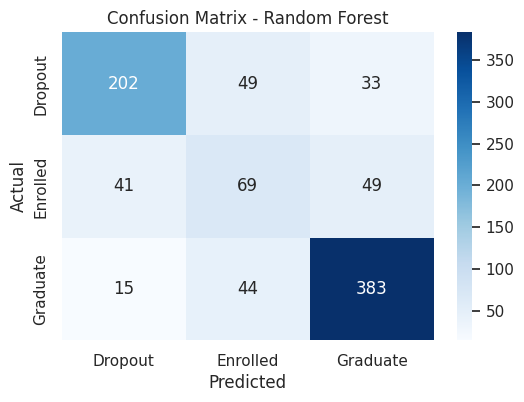


=== Naive Bayes ===
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.27      0.41       284
    Enrolled       0.21      0.90      0.34       159
    Graduate       0.82      0.20      0.32       442

    accuracy                           0.35       885
   macro avg       0.62      0.46      0.36       885
weighted avg       0.72      0.35      0.35       885



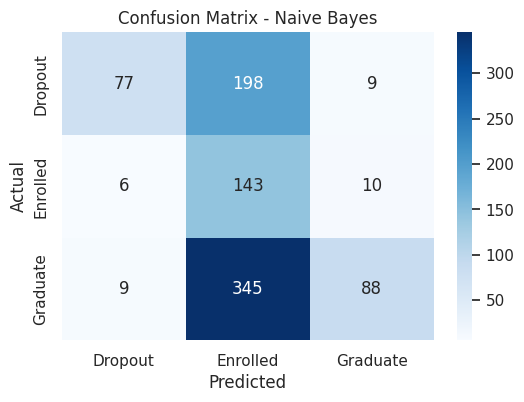


=== SVM ===
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.69      0.74       284
    Enrolled       0.37      0.55      0.45       159
    Graduate       0.85      0.78      0.81       442

    accuracy                           0.71       885
   macro avg       0.67      0.67      0.67       885
weighted avg       0.75      0.71      0.72       885



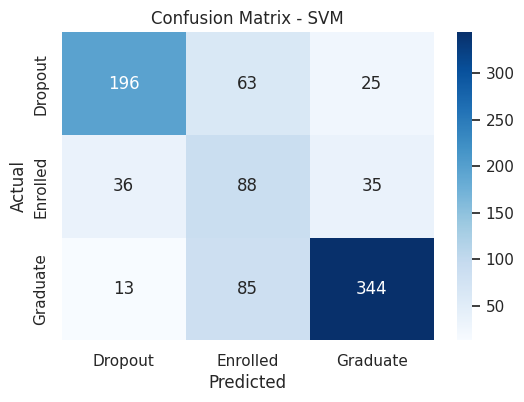

In [ ]:
def evaluate_model(model, X_test, y_test_enc, model_name, le_target, is_nb=False):
    if is_nb:
        X_test = X_test.toarray()
    y_pred_enc = model.predict(X_test)
    y_pred = le_target.inverse_transform(y_pred_enc)
    y_test = le_target.inverse_transform(y_test_enc)

    print(f"\n=== {model_name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=le_target.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluasi
evaluate_model(rf_model, X_test_preprocessed, y_test_enc, "Random Forest", le_target)
evaluate_model(nb_model, X_test_preprocessed, y_test_enc, "Naive Bayes", le_target, is_nb=True)
evaluate_model(svm_model, X_test_preprocessed, y_test_enc, "SVM", le_target)

Berdasarkan hasil evaluasi, model terbaik yang diperoleh adalah Random Forest dengan akurasi sebesar 74%. Random Forest menunjukkan performa yang lebih seimbang dengan menghasilkan f1-score yang konsisten di ketiga kelas yakni Dropout, Enrolled, dan Graduate. Hal ini mengindikasikan bahwa model mampu mengenali pola dalam data dengan lebih baik serta tidak bias terhadap salah satu kelas tertentu, berbeda dengan model lain yang cenderung memberikan performa kurang merata.

Oleh karena itu, Random Forest dipilih sebagai model akhir karena memberikan prediksi yang lebih adil dan konsisten. Model ini dapat diandalkan sebagai alat bantu dalam pengambilan keputusan terkait status mahasiswa, sehingga dapat mendukung pihak kampus dalam melakukan intervensi yang tepat untuk meningkatkan keberhasilan studi mahasiswa.

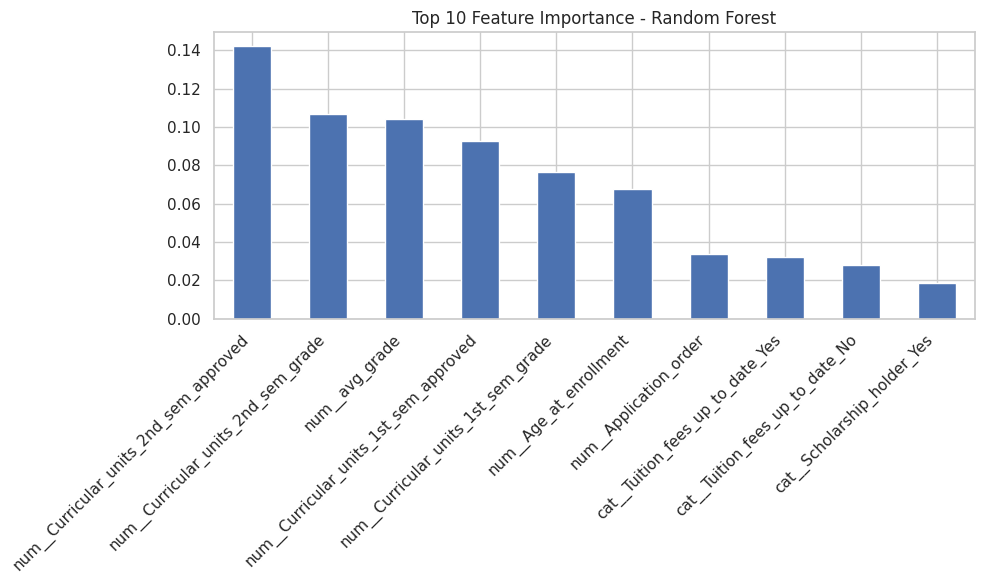

In [ ]:
# Feature Importance untuk Random Forest

importances = rf_model.feature_importances_

feature_names = preprocessor.get_feature_names_out()
feature_importance = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importance - Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Simpan Label Encoder
joblib.dump(le_target, 'label_encoder.pkl')

# Simpan preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

# Simpan model Random Forest
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']